## Carga de librerías

In [4]:
import os
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

## Carga de datos

In [9]:
# Ruta de ubicación de los datos
ruta = os.path.abspath('../data/modelos_entrenamiento/')

# Cargar los datos
X_train = pd.read_csv(os.path.join(ruta, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(ruta, 'y_train.csv')).values.ravel()
X_val = pd.read_csv(os.path.join(ruta, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(ruta, 'y_val.csv')).values.ravel()
X_test = pd.read_csv(os.path.join(ruta, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(ruta, 'y_test.csv')).values.ravel()

## Inicializar el clasificador XG Boost

In [10]:
# Inicializar el clasificador XGBoost
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Problema de clasificación binaria
    eval_metric='logloss',  # Métrica de evaluación (puede ser logloss para problemas de clasificación binaria)
    use_label_encoder=False,  # Evitar advertencias del uso del codificador de etiquetas obsoleto
    n_estimators=100,  # Número de árboles en el modelo
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=6,  # Profundidad máxima de los árboles
    random_state=42  # Para reproducibilidad
)

## Ajustar el modelo con los datos de entrenamiento

In [11]:
# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train, 
          eval_set=[(X_val, y_val)], 
          #early_stopping_rounds=10,  # Detenerse si la métrica no mejora en 10 iteraciones
          verbose=100)  # Imprimir información cada 100 iteraciones


[0]	validation_0-logloss:0.61077


c:\Users\Administrator\Documents\G1_ML_Airline\myenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:02:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[99]	validation_0-logloss:0.10071


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Calcular métricas de evaluación

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hacer predicciones y calcular probabilidades para el conjunto de prueba
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular métricas de evaluación para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Imprimir resultados para el conjunto de prueba
print(f'Conjunto de Prueba:')
print(f'Accuracy: {accuracy_test:.2f}')
print(f'Precision: {precision_test:.2f}')
print(f'Recall: {recall_test:.2f}')
print(f'F1 Score: {f1_test:.2f}')
print(f'ROC AUC Score: {roc_auc_test:.2f}')

# Hacer predicciones y calcular probabilidades para el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Calcular métricas de evaluación para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)

# Imprimir resultados para el conjunto de entrenamiento
print(f'\nConjunto de Entrenamiento:')
print(f'Accuracy: {accuracy_train:.2f}')
print(f'Precision: {precision_train:.2f}')
print(f'Recall: {recall_train:.2f}')
print(f'F1 Score: {f1_train:.2f}')
print(f'ROC AUC Score: {roc_auc_train:.2f}')


Conjunto de Prueba:
Accuracy: 0.96
Precision: 0.97
Recall: 0.94
F1 Score: 0.95
ROC AUC Score: 0.99

Conjunto de Entrenamiento:
Accuracy: 0.97
Precision: 0.97
Recall: 0.94
F1 Score: 0.96
ROC AUC Score: 1.00


## Obtener la importancia de las variables

In [22]:
# Obtener la importancia de las características
importancia_caracteristicas = model.feature_importances_

# Crear un DataFrame para mostrar la importancia con los nombres de las características
importancia_df = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importancia_caracteristicas
})

# Ordenar el DataFrame por la importancia de las características (de mayor a menor)
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)




## Visualizar la importancia de las variables

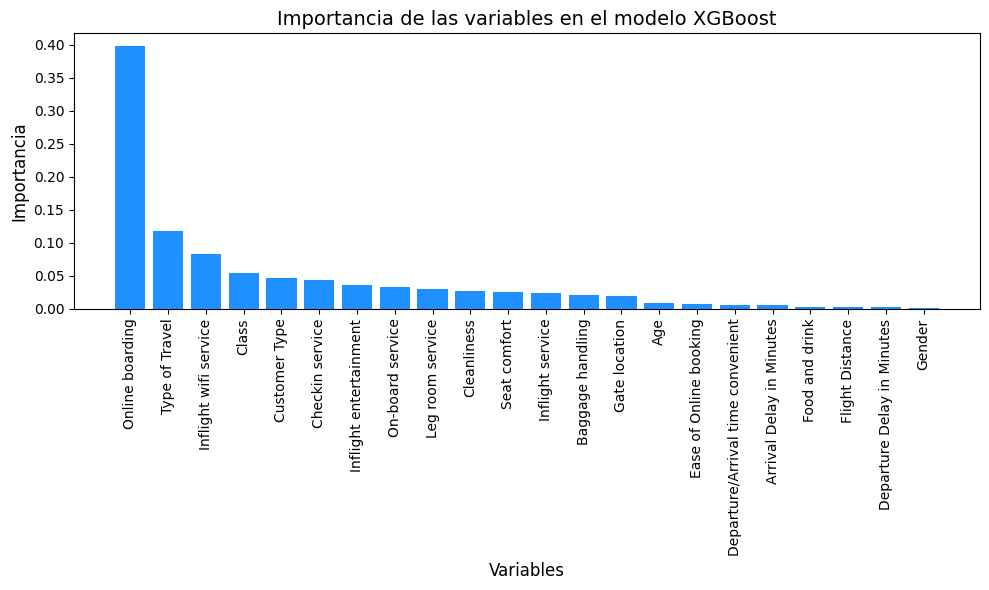

In [23]:
# Graficar las características ordenadas de mayor a menor
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
plt.bar(importancia_df['Característica'], importancia_df['Importancia'], color='dodgerblue')
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Importancia", fontsize=12)
plt.title("Importancia de las variables en el modelo XGBoost", fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotar las etiquetas del eje X
plt.tight_layout()  # Asegura que todo el gráfico se vea bien, sin etiquetas cortadas
plt.show()

